In [1]:
#Imports for the entire file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

In [2]:
#Creates a list of all the model objects we want to be calling in later lines
models = [LinearRegression(), ElasticNet(), Lasso(), Ridge()]

#Creates a list that will hold various dataframes from the user imported data
feature_types = []

In [3]:
#Getting the data from James Git Repository
%cd /content
!git clone https://github.com/jmanzer7/Rexchange_Data.git
%cd /content/Rexchange_Data/

#Reading in the realestate_info csv data and settting it to a variable
realestate_info = pd.read_csv("realestate_info.csv")

#Drops any null data
realestate_info = realestate_info.loc[:, ~realestate_info.columns.str.contains('Unnamed')]

#Shows how many rows we lost by dropping NaN data. The regression can not be generated with NaN values
print('%d rows before dropna' % len(realestate_info))
realestate_info = realestate_info.dropna()
print('%d rows after dropna' % len(realestate_info))

#For loop that helps modify the columns within the data and converts them to numeric values
for field in ['List Price', 'Close Price', 'Approx Total SqFt', 'Approx Living Area']:
  realestate_info[field] = realestate_info[field].str.replace('\D','', regex = True)
  realestate_info[field] = pd.to_numeric(realestate_info[field])

#Second for loop that just converts certain columns to numeric values
for field in ['Beds Total', 'Baths Full', 'Baths Half']:
  realestate_info[field] = pd.to_numeric(realestate_info[field])


#Prints out all of the data types
print(realestate_info.dtypes)

/content
Cloning into 'Rexchange_Data'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 60.12 KiB | 2.61 MiB/s, done.
/content/Rexchange_Data
999 rows before dropna
988 rows after dropna
Zip                     int64
Address                object
List Price              int64
List  Date             object
Approx Living Area      int64
Approx Total SqFt       int64
Cond                   object
Beds Total            float64
Baths Full            float64
Baths Half            float64
DOM                     int64
Close Price             int64
Close Date             object
SP$/SQFT               object
dtype: object


In [4]:
#Reading in the MLS10323 csv data and setting it to a variable
MLS10323 = pd.read_csv("MLS10323.csv")

#Drops any null dataa
MLS10323 = MLS10323.loc[:, ~MLS10323.columns.str.contains('Unnamed')].copy()


#For loop that helps modify the columns within the data and converts them to numeric values
for field in ['List Price', 'Close Price', 'Approx Total SqFt', 'Approx Living Area']:
  MLS10323[field] = MLS10323[field].str.replace('\D','', regex = True)
  MLS10323[field] = pd.to_numeric(MLS10323[field])

#Second for loop that just converts certain columns to numeric values
for field in ['Beds Total', 'Baths Full', 'Baths Half']:
  MLS10323[field] = pd.to_numeric(MLS10323[field])


print(MLS10323.dtypes)

#Converts specific columns to conditional values rather than string or object array values
MLS1 = pd.get_dummies(MLS10323, columns=['Cond', 'Zip', 'Beds Total', 'Baths Full', 'Baths Half', 'Stories']).drop(axis=1, labels=['List  Date', 'Close Price', 'DOM', 'Close Date', 'SP$/SQFT', 'Address', 'Fencing', 'Pool Type'])

#drops specific columns out of the new dataset
MLS2 = MLS1.dropna(subset=["Foundation", 'Construction Materials', 'Car Storage', 'Approx Living Area', 'Approx Total SqFt']).copy()

#Converts certain columns to conditional values rather than strings column by column
#instead of everything bunched up
MLS2['Slab'] = MLS2['Foundation'].str.contains('Slab').astype(int)
MLS2['Raised'] = MLS2['Foundation'].str.contains('Raised').astype(int)
MLS2['Other'] = MLS2['Foundation'].str.contains('Other').astype(int)
MLS2['Aluminum Siding'] = MLS2['Construction Materials'].str.contains('Aluminum Siding').astype(int)
MLS2['Siding'] = MLS2['Construction Materials'].str.contains('Siding').astype(int)
MLS2['Brick'] = MLS2['Construction Materials'].str.contains('Brick').astype(int)
MLS2['Stucco'] = MLS2['Construction Materials'].str.contains('Stucco').astype(int)
MLS2['Wood Siding'] = MLS2['Construction Materials'].str.contains('Wood Siding').astype(int)
MLS2['Hardy Plank'] = MLS2['Construction Materials'].str.contains('Hardy Plank').astype(int)
MLS2['Other'] = MLS2['Construction Materials'].str.contains('Other').astype(int)
MLS2['Vinyl Siding'] = MLS2['Construction Materials'].str.contains('Vinyl Siding').astype(int)
MLS2['Reclaimed Materials'] = MLS2['Construction Materials'].str.contains('Reclaimed Materials').astype(int)
MLS2['Frame'] = MLS2['Construction Materials'].str.contains('Frame').astype(int)
MLS2['None'] = MLS2['Car Storage'].str.contains('None').astype(int)
MLS2['Off Street Parking'] = MLS2['Car Storage'].str.contains('Off Street Parking').astype(int)
MLS2['Three or More'] = MLS2['Car Storage'].str.contains('Three or More').astype(int)
MLS2['Two'] = MLS2['Car Storage'].str.contains('Two').astype(int)
MLS2['One'] = MLS2['Car Storage'].str.contains('One').astype(int)
MLS2['Carport'] = MLS2['Car Storage'].str.contains('Carport').astype(int)
MLS2['Driveway Only'] = MLS2['Car Storage'].str.contains('Driveway Only').astype(int)
MLS2['Covered'] = MLS2['Car Storage'].str.contains('Covered').astype(int)
MLS2['Garage'] = MLS2['Car Storage'].str.contains('Garage').astype(int)

#drops foundation, construction materials, and car storage columns from the MLS3 dataset
MLS3 = MLS2.drop(['Foundation', 'Construction Materials', 'Car Storage'], axis=1)

Zip                         int64
Address                    object
List Price                  int64
List  Date                 object
Approx Living Area        float64
Approx Total SqFt         float64
Cond                       object
Beds Total                  int64
Baths Full                  int64
Baths Half                float64
DOM                         int64
Close Price                 int64
Close Date                 object
SP$/SQFT                   object
Car Storage                object
Stories                   float64
Construction Materials     object
Foundation                 object
Fencing                    object
Pool Type                  object
dtype: object


In [5]:
#shows all of teh columns that are housed in the MLS1 dataset
#also displays MLS1
MLS1.columns
display(MLS1)

,List Price,Approx Living Area,Approx Total SqFt,Car Storage,Construction Materials,Foundation,Cond_AVG,Cond_EXCE,Cond_FAIR,Cond_NEW,...,Baths Full_7,Baths Full_8,Baths Half_0.0,Baths Half_1.0,Baths Half_2.0,Stories_1.0,Stories_1.5,Stories_2.0,Stories_2.5,Stories_3.0
0,490000,NaN,NaN,Garage,Brick,NaN,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,760000,NaN,NaN,None,"Hardy Plank, Wood Siding",Raised,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,49900,1620.0,1704.0,None,Aluminum Siding,Raised,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,49900,1370.0,1485.0,Off Street Parking,Brick,Raised,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,135000,3464.0,3530.0,"Three or More, Driveway Only","Brick, Siding",Raised,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,2250000,3798.0,4655.0,"One, Driveway Only","Hardy Plank, Wood Siding",Raised,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
754,1190000,1984.0,3436.0,Driveway Only,"Hardy Plank, Wood Siding",Raised,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
755,649900,1033.0,1897.0,"Two, Garage, Off Street Parking","Hardy Plank, Wood Siding",Raised,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
756,1250000,1924.0,2115.0,None,Wood Siding,Raised,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [6]:
#Creating our first dataframe using get_dummies to create conditional values for
#Cond, Zip, Beds Total, Baths Full, Baths Half and prints out the head of X_df
X_df = pd.get_dummies(realestate_info, columns=['Cond', 'Zip', 'Beds Total', 'Baths Full', 'Baths Half']).drop(axis=1, labels=['List  Date', 'Close Price', 'DOM', 'Close Date', 'SP$/SQFT', 'Address'])
X_df.head()


#Creates our x and y variables and scales/shapes the X variable
y1 = realestate_info['Close Price'].to_numpy()
X = X_df.to_numpy()
X = scale(X)
X.shape

(988, 36)

<Axes: >

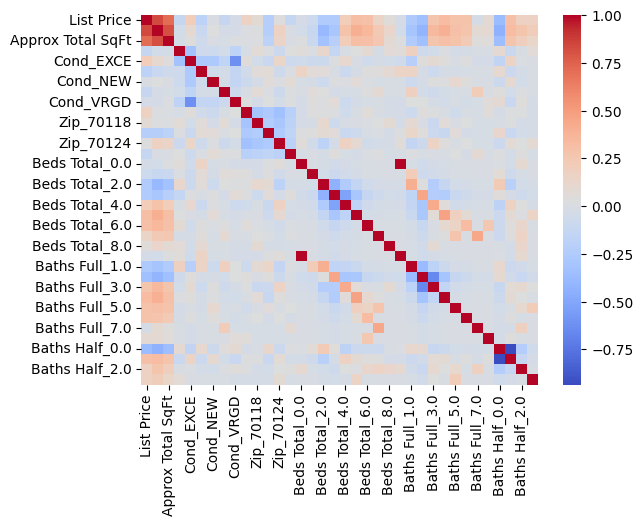

In [7]:
#Outputs a heatmap of the variabels we're using and their correlation towards
#other variables within the dataset
sns.heatmap(X_df.corr(), annot = False, cmap = 'coolwarm')

In [8]:
"""Calculations function takes in the mean standard error, mean absolute error,
    mean absolute percentage error, y_test data, and y_pred data to create calculations
    and append to various lists that are created outside of the calculations function

    Function does not return any values"""
def calculations(mse, mae, mape, y_test, y_pred):
    #calculates the mean absolute error
    mae.append(metrics.mean_absolute_error(y_test, y_pred))
    #calculates the mean squared error
    mse.append(metrics.mean_squared_error(y_test, y_pred))
    #calculates the mean absolute percentage error
    mape.append(mean_absolute_percentage_error(y_test, y_pred))

In [9]:
""" Table Creator function takes in the names of all machine learning models
    being used, the mean absolute erorr list, the mean squared error list,
    and the mean absolute percentage error list to format a table that prints out
    the various information from the lists in a formated table that is easy for
    the user to read

    Function does not return any values"""

def table_creator(models, maes, mses, mapes):
    #formats a table dataframe that outputs all on one line in a similar
    #way to this:
    #       Model          MAE         MSE         MAPE
    # 0   (model_name) (MAE value) (MSE value) (MAPE value)
    table = pd.DataFrame({'Model': models, 'MAE': maes, 'MSE': mses, 'MAPE': mapes})
    #prints out the table
    print(table)

In [10]:
""" Model Caller takes in a dataframe  and a list of y values (used as the
    values that a user would want to the function to predict) and manipulates the data
    to create various vairables that aid in putting the data through various machine
    learning models.

    The function also runs the manipulated data through a for loop that creates predictions
    and does testing as well as calls the calcuations caller to do various calculations
    needed to check the accuracy of the predictions the Model Caller function is creating with
    each ML model
    """

def model_caller(df, y):
    #creates the list with the types of machine learning models to be used
    models = ["Linear Regression", "Lasso", "Elastic Net"]
    #creates a list of numerical values allowing
    model_types = [1,2,3,4]

    #creates the testing and trainning data, where 80% is training data, 20%
    # is testing data, and there's a random state of 100
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2 , random_state = 100)
    kf = KFold(n_splits = 10, random_state = 42, shuffle = True)
    #shapes the training and testing data
    y_train.shape
    y_test.shape

    #creates the lists for mse, mae, and mape which are needed for the calculations
    #function that is called within this function
    mse = []
    mae = []
    mape = []

    #for loop statement that loops through each of the model type numbers, allowing
    #the data to be trained and test on every machine learning model we
    #have set up
    for m in model_types:

        #creates temporary variabels of X_train, X_test, y_train, and y_test
        #so ensure that the data is consistent between each model, allowing us
        #to have more accurate calculation comparisons
        temp_x_train = X_train
        temp_x_test = X_test
        temp_y_train = y_train
        temp_y_test = y_test

        #if statement used to have data run through a linear regression model
        #and then run the tested and predicted data through the calculations function
        if m == 1:
            reg_model = linear_model.LinearRegression()
            reg_model = LinearRegression().fit(temp_x_train, temp_y_train)
            reg_ypred = reg_model.predict(temp_x_test)
            calculations(mse, mae, mape, temp_y_test, reg_ypred)

        #if statement used to have data run through a ridge regression model
        #and then run the tested and predicted data through the calculations function
        if m == 2:
            # work for ridge
            print()
        #if statement used to have data run through a lasso model and then
        #run the tested and predicted data through the calculations functin
        if m == 3:
            lasso = Lasso(alpha = 10)
            lasso.fit(temp_x_train, temp_y_train)
            lasso_y_pred = lasso.predict(temp_x_test)
            calculations(mse, mae, mape, temp_y_test, lasso_y_pred)
        #if statemend used to have data run through the elastic net model and
        #then run the tested and predicted data through the calculations function
        if m == 4:
            elas_model = ElasticNet(alpha = 1.0, l1_ratio= 0.5)
            elas_model.fit(temp_x_train, temp_y_train)
            elas_pred = elas_model.predict(temp_x_test)
            calculations(mse, mae, mape, temp_y_test, elas_pred)
    #runs the models, mae, mse, amd mape lists through the table creator
    #fuction allowing us to print out a formated table showing data
    #regarding how well the predictions and testing went through each ML model
    #we used
    table_creator(models, mae, mse, mape)

In [11]:
#calls the model function with our dataframe used for predictions and our y
#value used for testing
model_caller(X_df, y1)


               Model           MAE           MSE      MAPE
0  Linear Regression  24221.818630  1.484716e+09  0.044912
1              Lasso  24163.102094  1.514669e+09  0.044524
2        Elastic Net  24557.157184  1.507434e+09  0.046528
